In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from functions import *

# 2. Exploratory Data Analysis

<br>

Before diving into the K-Means clustering we would like to visualize our dataset that consists of reviews of fine foods from Amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.


The dataset is loaded from the file Reviews.csv and includes:
* 568,454 reviews, between Oct 1999 and Oct 2012
* 256,059 users
* 74,258 products
* 260 users with > 50 reviews

In [2]:
# Loading the dataset from the file Reviews.csv

reviewsDataset = pd.read_csv('./data/Reviews.csv')

The dataset contains 568454 entries and is structured in ten columns:
* __Id__, contains the row id
* __ProductId__, identifies the product uniquely
* __UserId__, identifies the user uniquely
* __ProfileName__, contains the profile name of the user
* __HelpfulnessNumerator__, contains the number of users who found the review helpful
* __HelpfulnessDenominator__, contains the number of users who indicated whether they found the review helpful or not
* __Score__, contains the rating, between 1 and 5, left for the reviewed product
* __Time__, contains the timestamp when the review was inserted by the user
* __Summary__, contains a brief summary of the review
* __Text__, contains the text of the review

In [4]:
# Viewing the columns and their types

reviewsDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


Other helpful and interesting insights are the followings:

* The average number of users who found a review helpful is around 1.74
* The average number of users who indicated whether they found a review helpful or not is around 2.22
* The average rating left for a product is around 4.18

In [5]:
# Some statistics about the dataset

reviewsDataset.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


Since the dataset contains just a few NaN values they are going to be replaced with an empty string.

In [4]:
# The total number of NaN values is 43

reviewsDataset.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [5]:
# Replacing NaN values of the columns "ProfileName" and "Summary" with an empty string

reviewsDataset["ProfileName"].fillna("", inplace=True)
reviewsDataset["Summary"].fillna("", inplace=True)

In [6]:
# Converting the Unix epoch time into a timestamp for a better visualization and storing it into another column

reviewsDataset['Datetime'] = reviewsDataset.Time.apply(lambda value: pd.to_datetime(value, unit='s'))

In [7]:
# Deleting "Time" column since it became unnecessary

reviewsDataset.drop(columns="Time", inplace=True)

(array([0, 1, 2]),
 [Text(0, 0, 'B007JFMH8M'),
  Text(1, 0, 'B002QWP89S'),
  Text(2, 0, 'B002QWP8H0')])

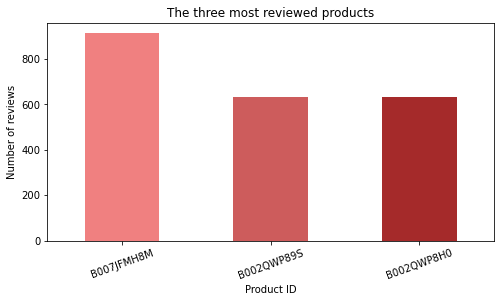

In [8]:
# A glance at the three most reviewed products of the dataset

reviewsDataset["Id"].groupby([reviewsDataset.ProductId]).\
                     count().\
                     sort_values(ascending=False).\
                     head(3).\
                     plot.bar(xlabel="Product ID",\
                              ylabel="Number of reviews",\
                              title="The three most reviewed products",\
                              color=["lightcoral","indianred","brown"],\
                              figsize=(8,4))
plt.xticks(rotation=20)

(array([0, 1, 2]),
 [Text(0, 0, '2012'), Text(1, 0, '2011'), Text(2, 0, '2010')])

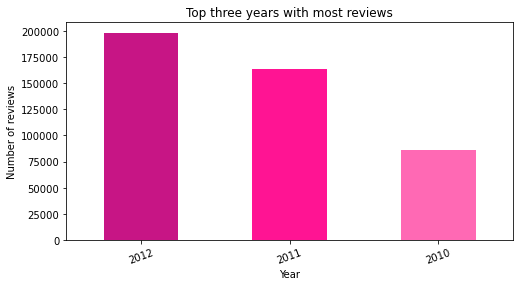

In [9]:
# Top three years with most reviews

reviewsDataset.groupby(reviewsDataset.Datetime.dt.year).Text.count().\
               sort_values(ascending=False).\
               head(3).plot.bar(xlabel="Year",\
                                ylabel="Number of reviews",\
                                title="Top three years with most reviews",\
                                color=["mediumvioletred","deeppink","hotpink"],\
                                figsize=(8,4))
plt.xticks(rotation=20)


## 2.1 Cleaning the data

In [ ]:
# Converting the reviews to lowercase and removing html tags

reviewsDataset['Text'] = reviewsDataset['Text'].str.lower()

# Removing html tags

reviewsDataset["Text"] = reviewsDataset['Text'].apply(lambda review: remove_html_tag(review))

# Removing punctuation, special characters, digits 
# Tokenizing, lemmatizing and stemming the data

#clean_data(reviewsDataset.iloc[1].Text)
reviewsDataset["Text"] = reviewsDataset['Text'].apply(lambda review: clean_data(review))